In [1]:
# Import Pandas, Numpy 
import pandas as pd
import numpy as np

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
# plt.style.available
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the CSV file
df = pd.read_csv('cable.csv', index_col=0, parse_dates=True, dayfirst=True)['2011':'2023']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0
...,...,...,...,...,...,...
2023-01-13,1.221643,1.224695,1.215185,1.221777,1.221777,0.0
2023-01-16,1.222464,1.228864,1.217434,1.222673,1.222673,0.0
2023-01-17,1.220882,1.229982,1.217063,1.220778,1.220778,0.0


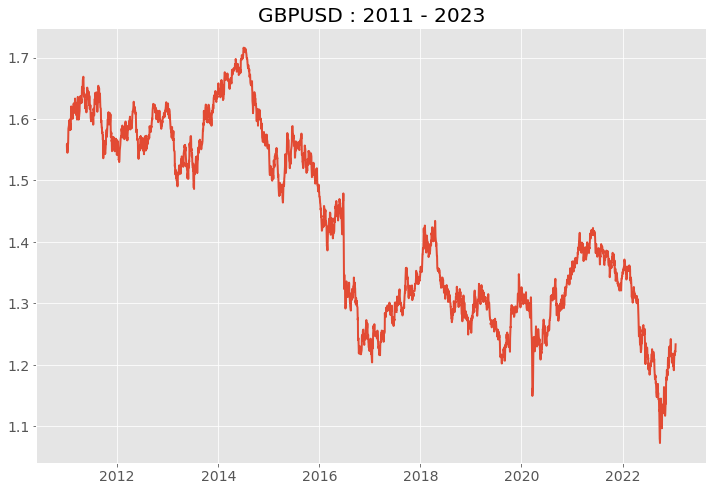

In [5]:
# Visualize the plot to verify the data
plt.plot(df['Adj Close'])
plt.title('GBPUSD : 2011 - 2023');


In [6]:
# Verify the datetime format
df.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=3144, freq=None)

In [7]:
# get last 300 index values
df.index[-300:]

DatetimeIndex(['2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09',
               ...
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [8]:
# Calculate returns and add it to existing DataFrame as a column
df['Return'] = df['Adj Close'].pct_change().fillna(0)

# Get first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940


In [9]:
# Calculate mean and sigma
mu = np.mean(df['Return'])
sigma = np.std(df['Return'])

In [10]:
# Calculate the scaled return : zscore
df['Scaled_Return'] = df['Return'].apply(lambda x: (x-mu)/sigma)

# Check the output
df.head()


,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2011-01-03,1.557608,1.557608,1.543996,1.557244,1.557244,0.0,0.000000,0.010274
2011-01-04,1.548899,1.564602,1.545595,1.548971,1.548971,0.0,-0.005313,-0.929099
2011-01-05,1.560014,1.562598,1.545595,1.559795,1.559795,0.0,0.006988,1.245869
2011-01-06,1.551301,1.556009,1.546814,1.551205,1.551205,0.0,-0.005507,-0.963499
2011-01-07,1.545308,1.557899,1.541592,1.545094,1.545094,0.0,-0.003940,-0.686313


In [11]:
# Calculate minimum and maximum bin range
df['Scaled_Return'].max(), df['Scaled_Return'].min()

(5.451295057860448, -13.434929545274672)

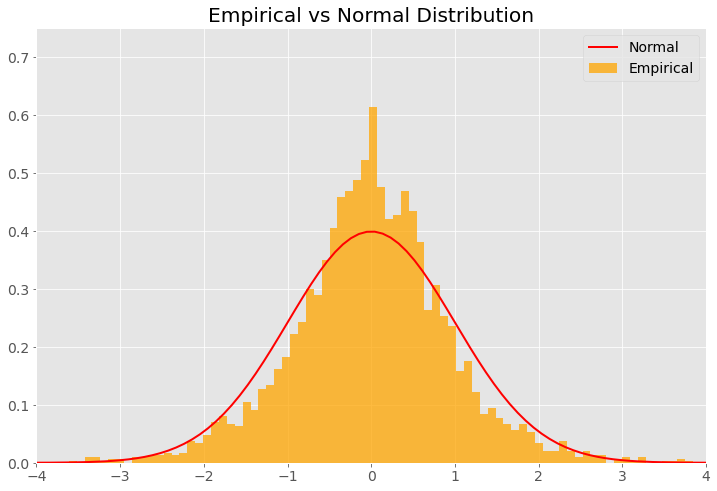

In [12]:
# Define bins
x = np.linspace(df['Scaled_Return'].min(), df['Scaled_Return'].max(), 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2))

# Plot histogram of scaled returns
plt.hist(df['Scaled_Return'], bins=200, density=True, color='orange', alpha=0.75, label='Empirical')

# Plot norm pdf
plt.plot(x,y,label='Normal', color='red', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.75)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend()
plt.show()